Paquetes necesarios

In [2]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

TAREA: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el máximo para filas y columnas (uno para cada) y muestra el número de filas con un número de píxeles blancos mayor o igual que 0.95*máximo.

Maximum value:  [0.4296875]
Rows above 95%:  2


(0.0, 512.0)

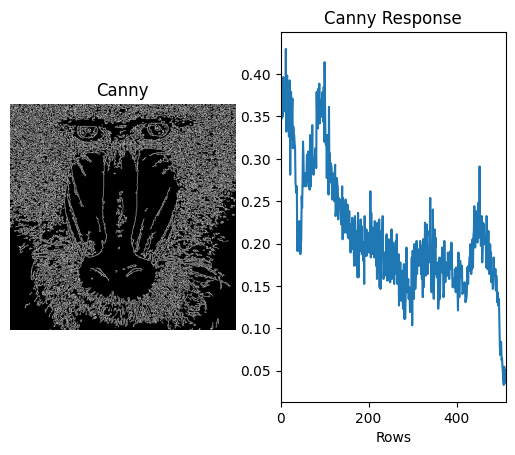

In [5]:
# Read the mandrill image from file
img = cv2.imread('mandril.jpg') 

# Convert the original BGR image to grayscale
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
canny = cv2.Canny(gris, 100, 200)

# The content of the Canny result image are values 0 or 255, you can check by uncommenting
# print(canny)
# Count the number of white pixels (255) per row
# Sum the pixel values for each row
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
# Normalize based on the number of columns and the maximum pixel value (255)
# The result will be the number of white pixels per row
rows = row_counts/(255 * canny.shape[0])

arg_max = max(rows)

top_limit = arg_max * 0.95
rows_above_limit = 0

for i in range(rows.shape[0]):
    if rows[i][0] > top_limit:
        rows_above_limit += 1

print("Maximum value: ", arg_max)

print("Rows above 95%: ", rows_above_limit)


# Display the count graphically
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Canny Response")
plt.xlabel("Rows")
plt.ylabel("% pixels")
plt.plot(rows)
# X-range defined by the rows
plt.xlim([0, canny.shape[1]])

TAREA: Aplica umbralizado a la imagen resultante de Sobel (valores 0 a 255 y convertida a 8 bits por ejemplo sobel8 = np.uint8(sobel)), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny. Calcula los máximos por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

Maximum value:  [0.31445312]
Rows above 95%:  3
Valor máximo:  0.349609375
Columnas por encima del 95%:  1
Comparado con Canny, debido al umbralizado hay mayor claridad en los bordes. Existe un menor porcentaje de pixeles blancos en la imagen de Sobel.


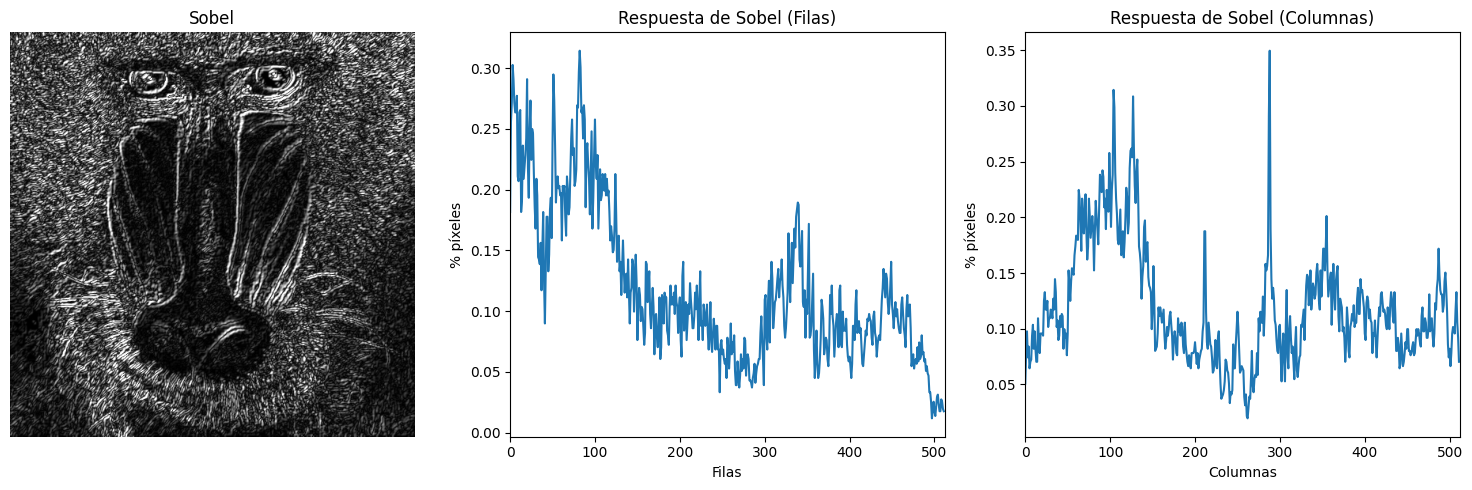

In [6]:
# Apply Gaussian blur to smooth the original image, removing high frequencies
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

# Calculate Sobel in both directions (horizontal and vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x direction
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y direction
# Combine both results
sobel = cv2.add(sobelx, sobely)

# Convert Sobel result to 8-bit unsigned integer
sobel8 = cv2.convertScaleAbs(sobel)
# Convert to grayscale
thresholdValue = 130  
# Threshold the Sobel result image
ret, thresholdedImage = cv2.threshold(sobel8, thresholdValue, 255, cv2.THRESH_BINARY)

# Count pixels by rows
row_counts = cv2.reduce(thresholdedImage, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
# Normalize results by dividing by the number of columns and the maximum pixel value (255)
rows = row_counts / (255 * thresholdedImage.shape[0])

# Calculate the maximum pixel value
arg_max = max(rows)
# Calculate the upper limit to determine how many rows have more than 95% white pixels
top_limit = arg_max * 0.95
rows_above_limit = 0

# Iterate through each row and count how many have more than 95% white pixels
for i in range(rows.shape[0]):
    if rows[i][0] > top_limit:
        rows_above_limit += 1

# Display the maximum value and the number of rows above 95%
print("Maximum value: ", arg_max)
print("Rows above 95%: ", rows_above_limit)

# Count pixels by columns
col_counts = cv2.reduce(thresholdedImage, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
# Normalize results by dividing by the number of rows and the maximum pixel value (255)
cols = col_counts[0] / (255 * thresholdedImage.shape[1])
# Calculate the maximum pixel value
arg_max = max(cols)
# Calculate the upper limit to determine how many columns have more than 95% white pixels
top_limit = arg_max * 0.95
cols_above_limit = 0

for i in range(cols.shape[0]):
    if cols[i] > top_limit:
        cols_above_limit += 1

print("Valor máximo: ", arg_max)
print("Columnas por encima del 95%: ", cols_above_limit)
print("Comparado con Canny, debido al umbralizado hay mayor claridad en los bordes. Existe un menor porcentaje de pixeles blancos en la imagen de Sobel.")

plt.figure(figsize=(15, 5))

# Sobel image
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title("Sobel")
plt.imshow(sobel8, cmap='gray')

# Rows plot
plt.subplot(1, 3, 2)
plt.title("Respuesta de Sobel (Filas)")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)
plt.xlim([0, sobel8.shape[0]])

# Columns plot
plt.subplot(1, 3, 3)
plt.title("Respuesta de Sobel (Columnas)")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)
plt.xlim([0, sobel8.shape[1]])

# Adjust layout and show the result
plt.tight_layout()
plt.show()





TAREA: Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, incluya al menos dos usos diferentes de aplicar las funciones de OpenCV trabajadas hasta ahora.


In [7]:


vid = cv2.VideoCapture(0)
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))
w = int(w/1.75)
h = int(h/1.5)

# Force half resolution to occupy less screen space

collage = np.zeros((h, w*5, 3), dtype=np.uint8)

# Its initialized outside of the loop to avoid reinitialization
eliminar_fondo = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=50, detectShadows=True)

while(True):
    ret, frame = vid.read()
    
    if ret:
        # Flip the image horizontally
        frame = cv2.resize(frame, (w, h), cv2.INTER_NEAREST)
        framem=cv2.flip(frame, 1)

        # Weighted sum of the image and a coloured image
        coloured_frame = cv2.addWeighted(framem, 0.7, np.full_like(frame, (0,127,255)), 0.3,0)
        
        frame_gray = cv2.cvtColor(framem, cv2.COLOR_BGR2GRAY)
        frame_gray = cv2.cvtColor(frame_gray, cv2.COLOR_GRAY2BGR)
        # Apply Gaussian filter to smooth the image and remove noise
        frame_blurred = cv2.GaussianBlur(framem, (3, 3), 0)
        # Calculate partial derivatives in x and y of the image by applying a Sobel filter to detect edges
        frame_sobelx = cv2.Sobel(frame_blurred, cv2.CV_64F, 1, 0)  # x
        frame_sobely = cv2.Sobel(frame_blurred, cv2.CV_64F, 0, 1)  # y
        # Combine both results
        frame_sobel = cv2.add(frame_sobelx, frame_sobely)

        # Convert to 8-bit format
        frame_blurred8 = cv2.convertScaleAbs(frame_sobel)

        # Convert to gray so that it has only 1 channel
        gray = cv2.cvtColor(frame_blurred8, cv2.COLOR_BGR2GRAY)

        # Apply thresholding (umbralizado), making the image binary
        ret, frame_threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
        # Convert to fit the 3 channels
        frame_threshold = cv2.cvtColor(frame_threshold, cv2.COLOR_GRAY2BGR)
        
        # Concatenate the various frames to show them together in the output
        collage[:, 0:w] = coloured_frame
        collage[:, w:w*2] = frame_gray
        collage[:, w*2:w*3] = frame_blurred8
        collage[:, w*3:w*4] = frame_sobel
        collage[:, w*4:w*5] = frame_threshold

        # Add text to the images
        cv2.putText(collage, "Efecto Sepia", (int(w/2)-70, 30), cv2.FONT_HERSHEY_TRIPLEX, 0.5, (255, 255, 255), 1)
        cv2.putText(collage, "Gris", (int(w + w/2)-30, 30), cv2.FONT_HERSHEY_TRIPLEX, 0.5, (255, 255, 255), 1)
        cv2.putText(collage, "Sin Ruido", (int(w*2 + w/2)-30, 30), cv2.FONT_HERSHEY_TRIPLEX, 0.5, (255, 255, 255), 1)
        cv2.rectangle(collage, (int(w*3 + w/2)-35, 10), (int(w*3 + w/2)+20, 40), (255, 255, 255), -1)
        cv2.putText(collage, "Sobel", (int(w*3 + w/2)-30, 30), cv2.FONT_HERSHEY_TRIPLEX, 0.5, (0, 0, 0), 1)
        cv2.putText(collage, "Umbralizado", (int(w*4 + w/2)-30, 30), cv2.FONT_HERSHEY_TRIPLEX, 0.5, (255, 255, 255), 1)

        cv2.imshow('Webcam', collage)

    if cv2.waitKey(20) == 27:
        break




    
vid.release()
cv2.destroyAllWindows()



TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) plantear una reinterpretación de la parte de procesamiento de la imagen tomando como punto de partida alguna de dichas instalaciones.

In [8]:

# Initialize video capture from the default camera (index 0)
vid = cv2.VideoCapture(0)

# Load the pre-trained Haar Cascade classifier for face detection
classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

# Function to detect faces in a frame
def detect_face(frame):
    # Convert the frame to grayscale for face detection
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Detect faces in the grayscale frame
    # Parameters:
    # - scaleFactor: How much the frame size is reduced at each iteration so that it can detect every size of face.
    #   1.1 means it is reduced by 10% each time. If the factor is smaller, it needs to do more iterations. This is done
    #   because computationally it is easier to reduce the frame than to make bigger the detection rectangle.
    # - minNeighbors: How many times the model detects it could be a face to retain it 
    # - minSize: Minimum possible object size. Objects smaller than this are ignored
    face = classifier.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=7, minSize=(50, 50))

    # Draw a black rectangle over each detected face and add text
    for (x, y, w, h) in face:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 0), -1)
        cv2.putText(frame, "null :(", (x + w//2 - 25, y + h//2), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.7, (255, 255, 255), 1)
        
    return face

# Main loop for video processing
while(True):
    # Read a frame from the video capture
    ret, frame = vid.read()
    # Break the loop if frame reading fails
    if(ret == False):
        break
    
    # Apply function to detect faces in the frame
    face = detect_face(frame)

   
    cv2.imshow("Deteccion de Caras",frame)

    
    if cv2.waitKey(20) == 27:
        break


vid.release()
cv2.destroyAllWindows()
    


    

